# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the data

In [2]:
# Load the CSV file
df = pd.read_csv("./Stock_Data/clean_stocks.csv") 
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
2,MSFT,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400
3,NFLX,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
4,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000
...,...,...,...,...,...,...,...,...
242,NFLX,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700
243,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
244,MSFT,2023-05-05,305.720001,311.970001,304.269989,310.649994,310.649994,28181200
245,NFLX,2023-05-05,323.609985,324.149994,319.440002,322.760010,322.760010,3988600


# 1. Basic Trend Analysis

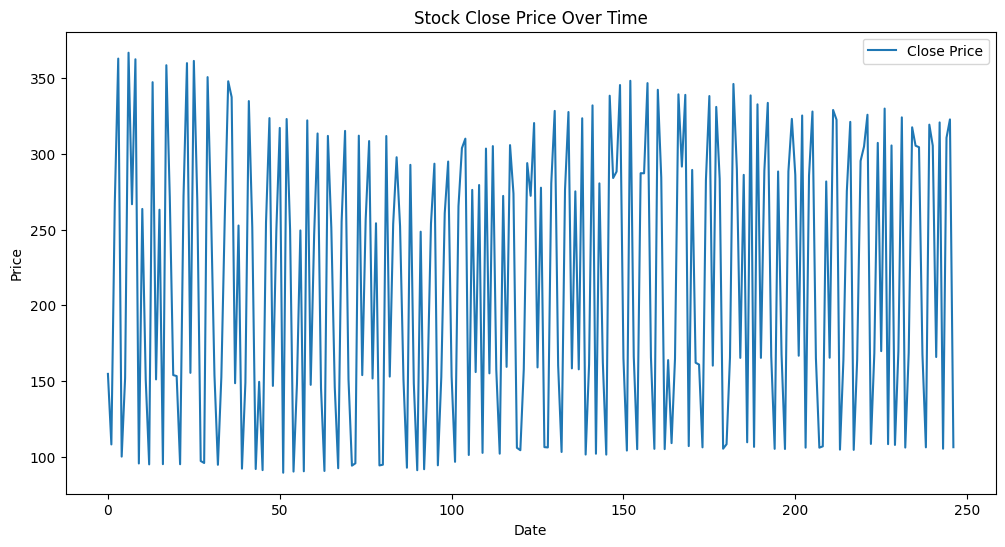

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [4]:
# Moving Averages
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

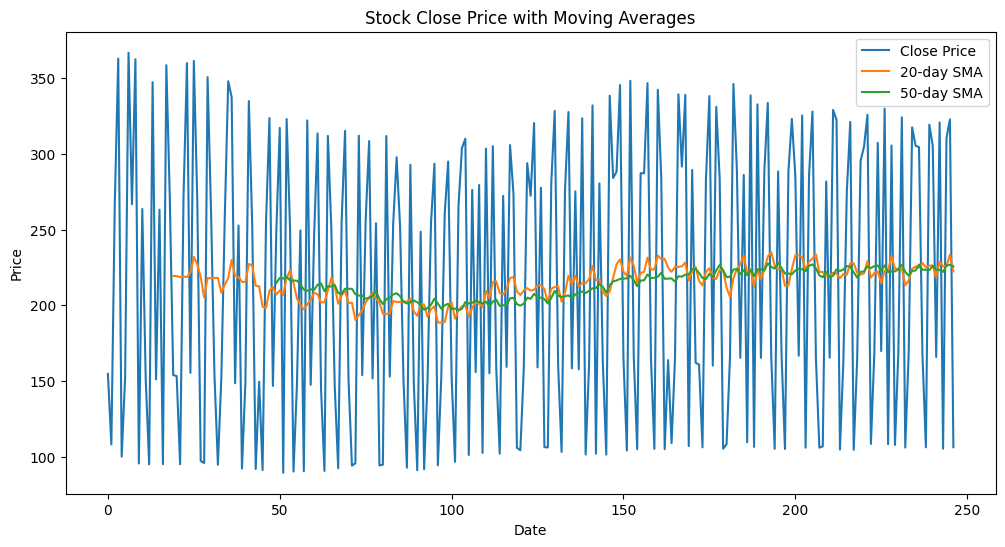

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='20-day SMA')
plt.plot(df['SMA_50'], label='50-day SMA')
plt.title('Stock Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2. Volatility Analysis

In [6]:
df['Daily_Return'] = df['Close'].pct_change()

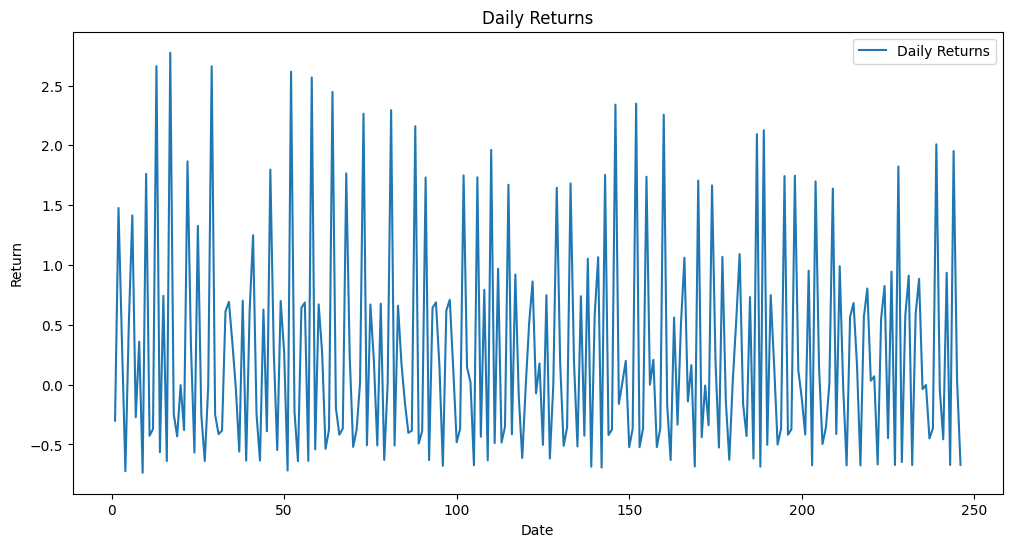

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Daily_Return'], label='Daily Returns')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

In [8]:
print(f"Standard Deviation of Daily Returns: {df['Daily_Return'].std()}")

Standard Deviation of Daily Returns: 0.8951344675251142


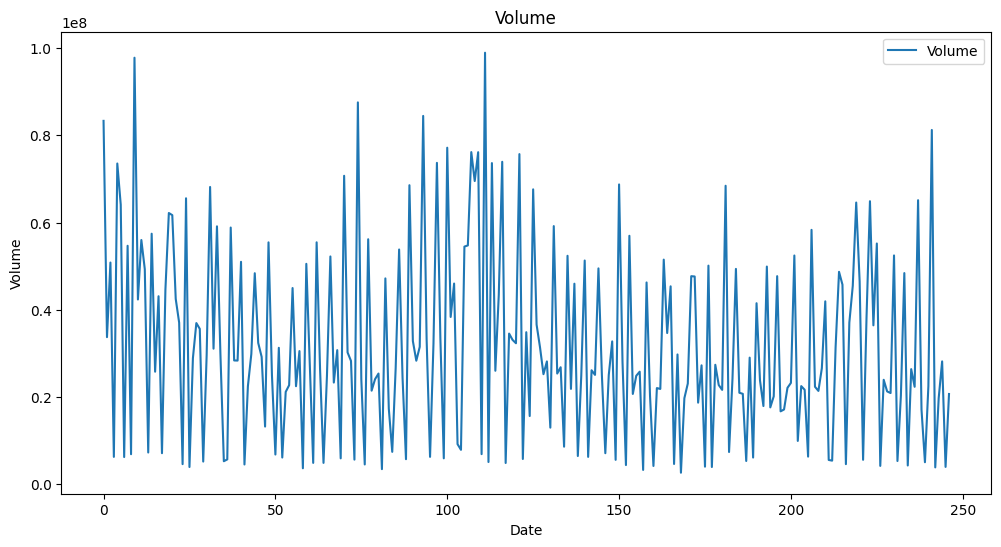

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = 'Volume')
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# 3. Time Series Analysis Basics

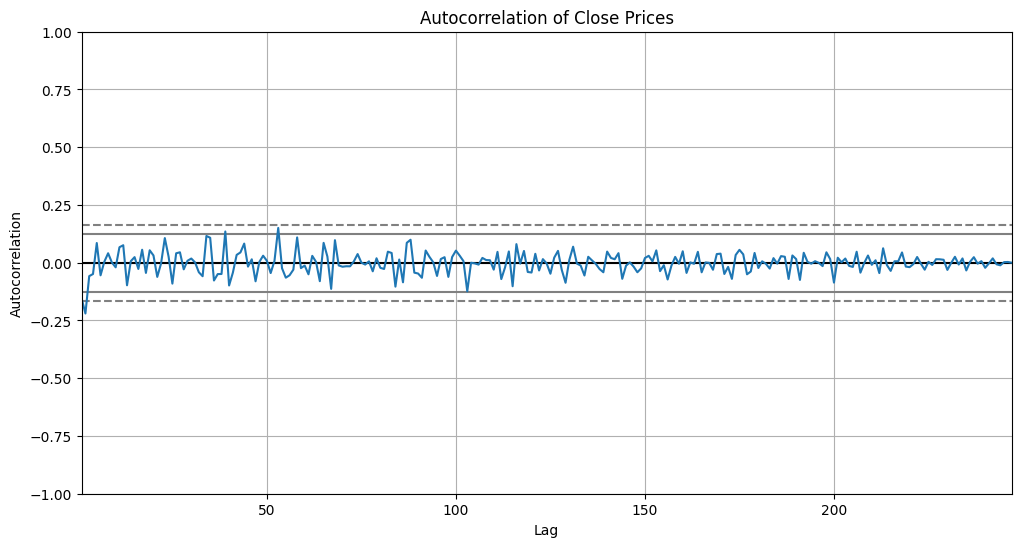

In [10]:
# Autocorrelation
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(df['Close'])
plt.title('Autocorrelation of Close Prices')
plt.show()

# 4. Simple Predictive Models (Linear Regression)

In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

In [20]:
df_lin_reg = df.reset_index() #reset index so date is a column again.
df_lin_reg['Date_ordinal'] = df_lin_reg['Date'].apply(lambda date: date.toordinal()) #convert dates to ordinal for regression.
df_lin_reg

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Daily_Return,Date_ordinal
0,2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN,NaN,NaN,738558
1,2023-02-07,GOOG,103.629997,108.669998,103.547997,108.040001,108.040001,33738800,NaN,NaN,-0.301390,738558
2,2023-02-07,MSFT,260.529999,268.769989,260.079987,267.559998,266.891510,50841400,NaN,NaN,1.476490,738558
3,2023-02-07,NFLX,358.510010,364.179993,354.179993,362.950012,362.950012,6289400,NaN,NaN,0.356518,738558
4,2023-02-08,GOOG,102.690002,103.580002,98.455002,100.000000,100.000000,73546000,NaN,NaN,-0.724480,738559
...,...,...,...,...,...,...,...,...,...,...,...,...
242,2023-05-04,NFLX,319.010010,323.609985,317.950012,320.779999,320.779999,3879700,228.860498,223.261999,0.934857,738644
243,2023-05-04,GOOG,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,225.700497,222.036799,-0.672018,738644
244,2023-05-05,MSFT,305.720001,311.970001,304.269989,310.649994,310.649994,28181200,225.869997,226.147399,1.952666,738645
245,2023-05-05,NFLX,323.609985,324.149994,319.440002,322.760010,322.760010,3988600,233.523997,226.835199,0.038983,738645


In [21]:
X = df_lin_reg['Date_ordinal']
y = df_lin_reg['Close']
X = sm.add_constant(X) #add constant for the regression.
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

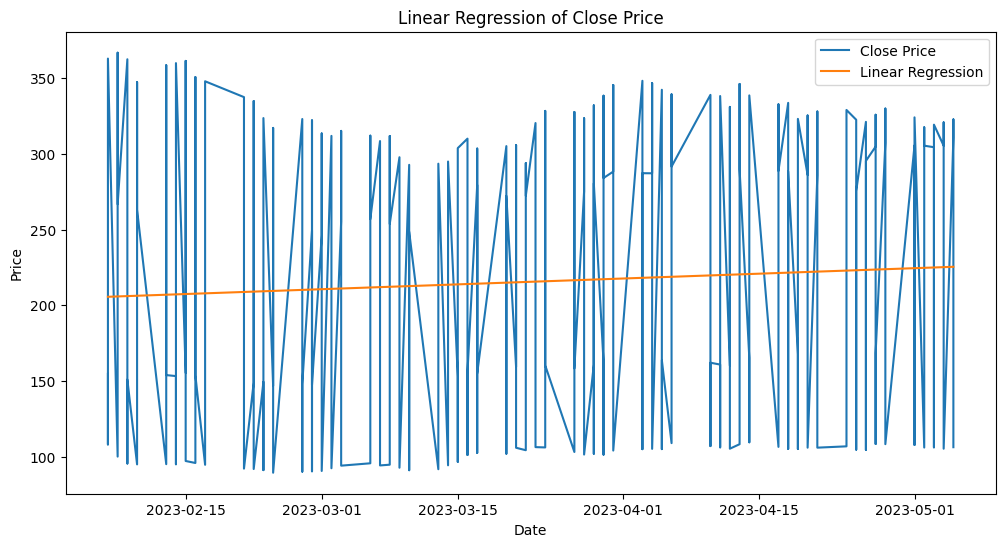

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_lin_reg['Date'], df_lin_reg['Close'], label='Close Price')
plt.plot(df_lin_reg['Date'], predictions, label='Linear Regression')
plt.title('Linear Regression of Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
print(model.summary()) #display regression summary.

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.016
Date:                Wed, 02 Apr 2025   Prob (F-statistic):              0.314
Time:                        11:55:20   Log-Likelihood:                -1465.3
No. Observations:                 247   AIC:                             2935.
Df Residuals:                     245   BIC:                             2942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.68e+05   1.67e+05     -1.007   